In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.neighbors import radius_neighbors_graph
from scipy.sparse import csgraph

In [2]:
#Steps to perform spectral clustering for 2-moon dataset.


#1.   Generate the dataset using sklearn package.
#2.   Translate the dataset into low-dimention using adjacency matrix and laplacian matrix in order to generate eigenvalues and eigenvectors.
#3.    Use eigenvalues and its corresponding eigenvector to classify datapoints into bipartioned graph.



In [3]:
'''Generates 2moon data'''
def generate_2moon():
  data_moon, ground_moon = make_moons(n_samples=1500, noise=.05) #data_moon sklearn dataset for two interleaving half circles, ground_moon is the ground truth after clustering
  fig, ax = plt.subplots(figsize=(7,7))
  ax.set_title('Ground Truth for clustering two moon', fontsize=20)
  ax.scatter(data_moon[:, 0], data_moon[:, 1],c=ground_moon,s=30)
  return data_moon

In [4]:
'''Calculate the adjacent and laplacian matrix'''
def calculate_adj_laplacian(data_circle):
  Adj = radius_neighbors_graph(data_circle,0.4,mode='distance', metric='minkowski', p=2, metric_params=None, include_self=False)
  Adj = Adj.toarray()
  L = csgraph.laplacian(Adj, normed=False)
  return L

In [5]:
'''Calculate eigenvalue and eigenvector'''
def calculate_eigenvalue_eigenvector(L):
  eigenvals, eigvects = np.linalg.eig(L)
  return eigvects;

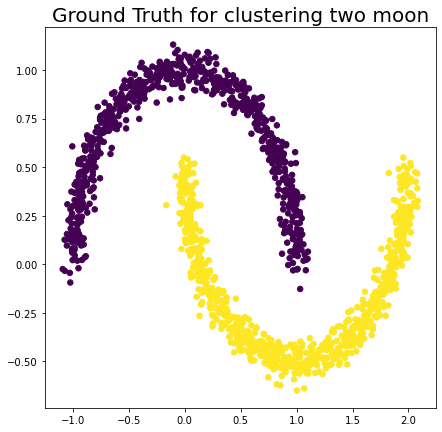

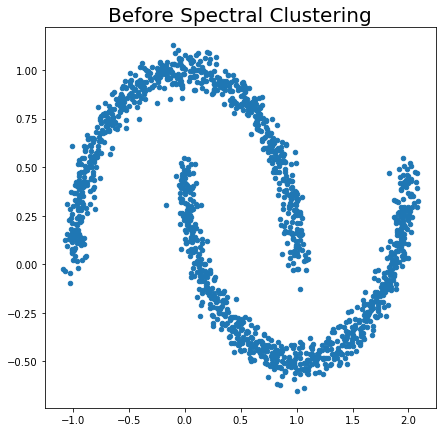

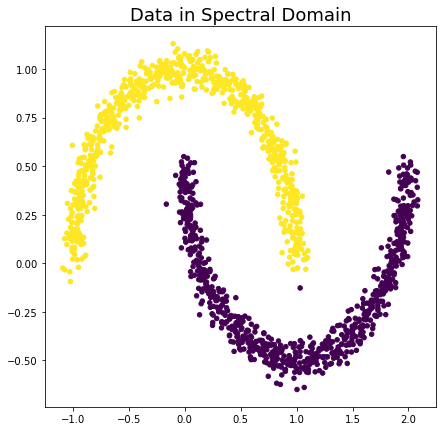

In [6]:
data_moon = generate_2moon()
L = calculate_adj_laplacian(data_moon)
eigvects = calculate_eigenvalue_eigenvector(L)

#For a connected graph, first nonzero eigenvalue corresponds to the connectivity of the graph. Copy the corresponding eigenvector.
clusters =eigvects[:,1].copy()
#Label eigenvector greater than 0 -> 1 and less than 0 -> 0
clusters[clusters < 0] = 0
clusters[clusters > 0] = 1

fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(data_moon[:, 0], data_moon[:, 1],s=20)
ax.set_title('Before Spectral Clustering', fontsize=20)

fig, ax = plt.subplots(figsize=(7,7))
ax.set_title('Data in Spectral Domain', fontsize=18)
ax.scatter(data_moon[:, 0], data_moon[:, 1],c=clusters ,s=20)